# Lab 1 - Classification with K-nearest neighbors

## M1DS - Machine Learning 1

### Instructions

1. Rename your notebook with your surnames as `lab1_Name1_Name2.ipynb`, and include your names in the notebook.

2. Your code, and its output, must be commented !

3. Please upload your notebook on Moodle in the dedicated section before the deadline.

<div style="background-color: rgba(255, 210, 0, 0.25); padding: 8px;">
Report written by Danila Pechenev, Gwenn Garrigues, 11/09/2025.
</div>

In [1]:
# Importing usual libraries
import numpy as np
from matplotlib import pyplot as plt

In this lab, we are going to use one of the most famous datasets in machine learning : the *Iris* dataset (so famous that it has a Wikipedia page, see [here](https://en.wikipedia.org/wiki/Iris_flower_data_set)).

In [2]:
from sklearn.datasets import load_iris

# Loading the dataset
dataset = load_iris()

The variable *dataset* has a dictionary-like structure. Let's take a look at the keys :

In [14]:
dataset.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

You should play around and check what the dataset contains (using the syntax `dataset['key']`).

**Q1**. What is this dataset about ? How many examples do we have ? How many features ? What does 0, 1, or 2 mean for the target variable ?

<div style="background-color: rgba(255, 210, 0, 0.25); padding: 8px;">
The data set consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters. Based on the combination of these four features, Fisher developed a linear discriminant model to distinguish each species.

Number of examples: 150

Number of features: 4

Target variables:
* 0 - Iris-Setosa
* 1 - Iris-Versicolour
* 2 - Iris-Virginica
</div>

**Q2.** Store the feature matrix in the variable X, and the target matrix in the variable y.

In [23]:
X = dataset['data']
y = dataset['target']
print('X:', X[:5])
print('y:', y[:5])

X: [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
y: [0 0 0 0 0]


**Q3.** Check whether there are some missing data in the dataset (both in X and y). You might want to use `np.isnan` (see the documentation [here](https://numpy.org/doc/stable/reference/generated/numpy.isnan.html)).

In [26]:
np.isnan(X).all()

np.False_

In [27]:
np.isnan(y).all()

np.False_

There is not missing data in X and y

**Q4.** For now, we are going to use KNN with $K = 3$. We are going to use the `scikit-learn` implementation, see the documentation [here](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html).
* Divide the dataset into a training set and a test set (80/20 split), setting `random_state` to 0 ;
* Train the model on the training set ;
* What is the accuracy of the model on the test set ?
* Display the confusion matrix (use `ConfusionMatrixDisplay`, with label names), and interpret it.

In [38]:
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [40]:
model = KNeighborsClassifier(n_neighbors=3, n_jobs=-1)
model.fit(X_train, y_train)

,n_neighbors,3
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,-1


In [41]:
predictions = model.predict(X_test)
predictions

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 2, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0])

In [42]:
accuracy_score(y_test, predictions)

0.9666666666666667

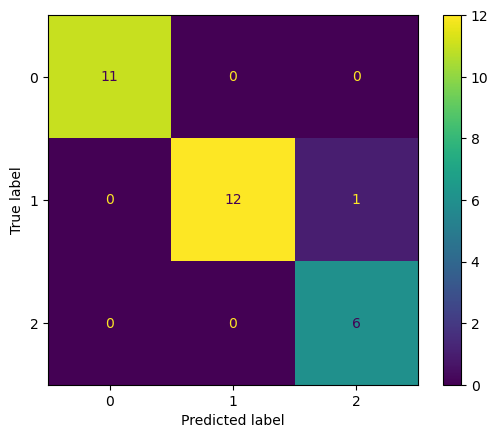

In [43]:
cm = confusion_matrix(y_test, predictions, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.show()

<div style="background-color: rgba(255, 210, 0, 0.25); padding: 8px;">
According to the confusion matrix, we only have one mistake: one sample labeled 1 was predicted as 2. Thus, k=3 is a good choice.

</div>

**Q5.** Evaluate now the performance (in terms of accuracy) of this model using a 5-fold cross-validation.

In [64]:
from sklearn.model_selection import KFold

def knn_k_fold(K, N, print_accuracies=False):
    kf = KFold(n_splits=N, shuffle=True, random_state=0)
    s = 0
    if print_accuracies:
        print("Accuracies:")
    for i, (train_index, test_index) in enumerate(kf.split(X)):
        X_fold_train = X[train_index]
        y_fold_train = y[train_index]
        X_fold_test = X[test_index]
        y_fold_test = y[test_index]
        
        model = KNeighborsClassifier(n_neighbors=K, n_jobs=-1)
        model.fit(X_fold_train, y_fold_train)
        predictions = model.predict(X_fold_test)
        accuracy = accuracy_score(y_fold_test, predictions)
        s += accuracy
        if print_accuracies:
            print(f"Fold {i}: {accuracy}")
    return s / N

accuracy = knn_k_fold(3, 5, True)
print('---')
print(f"Final accuracy: {accuracy}")

Accuracies:
Fold 0: 0.9666666666666667
Fold 1: 0.8666666666666667
Fold 2: 1.0
Fold 3: 1.0
Fold 4: 0.9333333333333333
---
Final accuracy: 0.9533333333333334


**Q6.** Now vary the value of $K$ between 1 and 50, and conclude as to which value gives the best performance.

In [77]:
accuracies = {}
for k in range(1, 51):
    accuracy = knn_k_fold(k, 5, False)
    accuracies[k] = accuracy

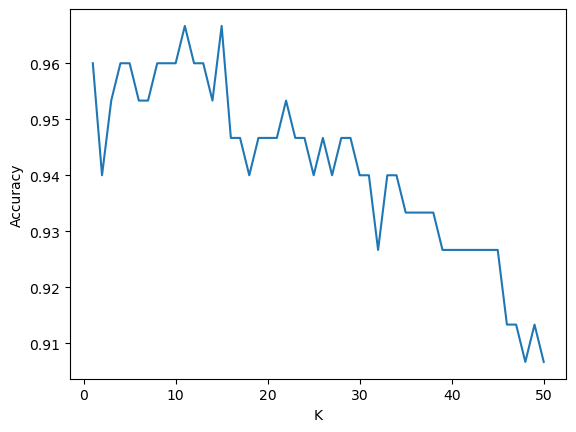

In [80]:
plt.plot(accuracies.keys(), accuracies.values())
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.show()

In [81]:
print(f"The best accuracy is achieved with k = {max(accuracies, key=accuracies.get)}")

The best accuracy is achieved with k = 11


<div style="background-color: rgba(255, 210, 0, 0.25); padding: 8px;">
The best accuracy is achieved with k=11 and k=15. But k=15 requires more computation when predicting the label of a sample, so we consider k=11 the best.
</div>

<div style="background-color: rgba(0, 255, 0, 0.15); padding: 8px;">
    
<b>Important note</b> : what you just implemented is a cross-validation for model selection (i.e., picking a value for the hyperparameter $K$).

In a real-world scenario, where we would need to report the final performance of the model, things would be slightly more complicated :

<ul>
  <li>Set aside 20% of the dataset as the test set. This test set will only be used once at the very end of the process, and not during cross-validation !</li>
  <li>Use the remaining 80% to perform cross-validation and select the best value for $K$ (exactly as in Q6). This means that each fold uses 64% of the original dataset for training and 16% for validating.</li>
  <li>Once the best value for $K$ has been set, retrain the model on the whole 80%</li>
  <li>Finally, evaluate and report the performance of the model on the previously held-out 20% test set.</li>
</ul> 

</div>

**Q7.** What other hyperparameter(s) of the KNN method could we set ?

<div style="background-color: rgba(255, 210, 0, 0.25); padding: 8px;">
We could also set:
<ul>
    <li>algorithm - a data structure we use to store data points and count distances efficiently</li>
    <li>metric and p for minkowski distance</li>
</ul> 
</div>

**Q8.** KNN can be extended to a *weighted* variant. What do you think it means ?

<div style="background-color: rgba(255, 210, 0, 0.25); padding: 8px;">
It might mean that the points that are closer to the sample weight more than ones further
</div>

**Q9.** For d varying from 1 to 100, draw 101 points uniformly at random in the unit hypercube of dimension $d$. Then, for each value of d, compute the average Euclidian distance between the first point and the other 100.

Which phenomenon are we illustrating ? What does this mean for KNN ?

In [97]:
rng = np.random.default_rng()
results = {}
for d in range(1, 101):
    s = 0
    points = rng.random((101, d))
    for i in range(1, 101):
        s += np.linalg.norm(points[0] - points[i])
    results[d] = s / 100

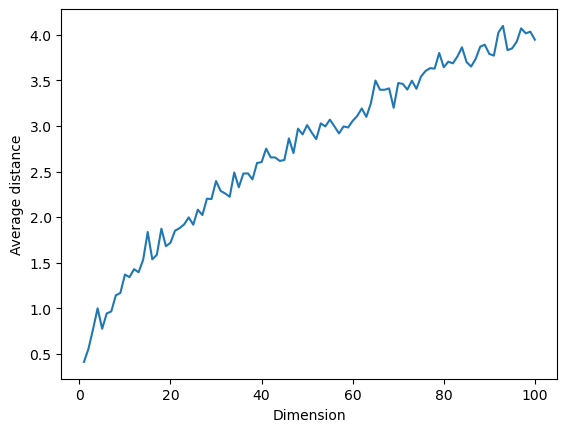

In [98]:
plt.plot(results.keys(), results.values())
plt.xlabel("Dimension")
plt.ylabel("Average distance")
plt.show()

<div style="background-color: rgba(255, 210, 0, 0.25); padding: 8px;">
The phenomenon is the <b>curse of dimensionality</b>. The larger the dimension of the data, the greater the distances between the points and the less meaningful they are (the initial intuition of the algorithm is lost).
</div>

---

End of lab1.